In [30]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce
import datetime as dt


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [32]:
path ='../Hakmin/raw'
dpath = '../dataset'

In [33]:
file_list = os.listdir(path)

In [34]:
file_list.sort()
file_list = file_list[4:]
file_list

['선수정보_2018.csv', '선수정보_2019.csv', '선수정보_2020.csv', '선수정보_2021.csv']

In [35]:
baseball=[]
for ls in file_list:
    baseball.append(pd.read_csv(os.path.join(path,ls), encoding='utf-8'))
    

In [36]:
for i in range(len(file_list)):
    baseball[i]['year']= int(file_list[i][5:9])

In [37]:
sum([baseball[i].shape[0] for i in range(4)])

63452

In [38]:
df[df['이름'].apply(lambda x : bool(re.match(string = x, pattern='[a-zA-Z]')))]['이름'].unique()

NameError: name 'df' is not defined

In [39]:
for i in range(len(baseball)):
    print(baseball[i][baseball[i]['이름'].apply(lambda x : bool(re.match(string = x, pattern='[a-zA-Z]')))]['이름'].unique())

['WO김재현' 'SK김재현']
['SS김민수' 'LT김민수']
[]
['SS김민수' 'LT김민수']


In [27]:
baseball[0].

,이름,날짜,상대,결과,점수,타순,P,선발,타수,득점,...,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA,year
0,정훈,04-29,한화,W,4:3,7,3B,1,2,0,...,1,0.000,0.000,0.000,0.000,8,1.51,-0.72,-0.046,2018
1,정훈,05-02,KIA,L,6:12,6,1B,1,4,0,...,0,0.125,0.111,0.250,0.361,12,1.09,-0.33,-0.032,2018
2,정훈,05-04,@SK,L,4:5,9,PH,0,1,1,...,0,0.300,0.273,0.800,1.073,3,0.44,1.00,0.025,2018
3,정훈,05-08,@LG,W,4:2,5,PH,0,1,0,...,0,0.333,0.308,0.750,1.058,6,0.49,-0.26,-0.013,2018
4,정훈,05-10,@LG,W,7:2,9,PH,0,1,0,...,0,0.333,0.313,0.667,0.979,3,0.02,-0.26,-0.001,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,이진영,09-29,롯데,L,3:8,5,DH,1,4,0,...,0,0.307,0.366,0.394,0.760,7,0.64,0.01,-0.066,2018
17541,이진영,10-02,@LG,L,6:10,2,DH,1,5,2,...,0,0.310,0.367,0.406,0.773,21,1.15,1.45,0.146,2018
17542,이진영,10-06,삼성,W,6:1,2,DH,1,4,0,...,0,0.305,0.360,0.398,0.758,20,0.90,0.07,-0.049,2018
17543,이진영,10-10,@롯데,W,10:1,2,DH,1,4,0,...,0,0.310,0.364,0.405,0.769,13,0.56,0.70,-0.020,2018


In [40]:
tot_baseball = reduce(lambda left, right: pd.concat([left,right]), baseball)

In [41]:
tot_baseball=tot_baseball.reset_index(drop=True)

In [42]:
tot_baseball['상대']=tot_baseball['상대'].str.replace(pat=r'[^\w]',repl='', regex=True)

In [46]:
tot_baseball[tot_baseball.이름.str.len()>=4]['이름'].unique()

array(['버나디나', '스크럭스', '파레디스', '반슬라이크', 'WO김재현', 'SK김재현', '가르시아', '윌리엄슨',
       '아수아헤', '해즐베이커', '스몰린스키', '베탄코트', 'SS김민수', 'LT김민수', '페르난데스',
       '살라디노', '프레이타스'], dtype=object)

In [4]:
os.path.join(dpath, 'total_baseball.csv')

'../dataset/total_baseball.csv'

In [ ]:
tot_baseball

In [5]:
tot_baseball = pd.read_csv(os.path.join(dpath, 'total_baseball.csv'))

In [63]:
tot_baseball

,이름,날짜,상대,결과,점수,타순,P,선발,타수,득점,...,출루,장타,OPS,투구,avLI,RE24,WPA,year,date,month
0,정훈,04-29,한화,W,4:3,7,3B,1,2,0,...,0.000,0.000,0.000,8,1.51,-0.72,-0.046,2018,2018-04-29,4
1,정훈,05-02,KIA,L,6:12,6,1B,1,4,0,...,0.111,0.250,0.361,12,1.09,-0.33,-0.032,2018,2018-05-02,5
2,정훈,05-04,SK,L,4:5,9,PH,0,1,1,...,0.273,0.800,1.073,3,0.44,1.00,0.025,2018,2018-05-04,5
3,정훈,05-08,LG,W,4:2,5,PH,0,1,0,...,0.308,0.750,1.058,6,0.49,-0.26,-0.013,2018,2018-05-08,5
4,정훈,05-10,LG,W,7:2,9,PH,0,1,0,...,0.313,0.667,0.979,3,0.02,-0.26,-0.001,2018,2018-05-10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63447,김상수,08-29,KT,L,3:8,9,2B,1,3,0,...,0.312,0.265,0.577,18,0.50,0.66,0.046,2021,2021-08-29,8
63448,김상수,09-01,키움,W,7:1,9,2B,1,2,2,...,0.320,0.268,0.588,18,0.67,2.07,0.098,2021,2021-09-01,9
63449,김상수,09-03,KIA,W,9:3,6,2B,1,3,1,...,0.322,0.268,0.590,11,0.57,0.90,0.060,2021,2021-09-03,9
63450,김상수,09-05,두산,L,5:6,9,2B,1,3,0,...,0.324,0.267,0.591,15,1.78,-0.02,-0.057,2021,2021-09-05,9


In [64]:
tot_baseball['date']=(tot_baseball['year'].astype(str) + '-' +tot_baseball['날짜']).apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d'))

In [65]:
tot_baseball['month'] = tot_baseball['날짜'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%m-%d')).dt.month

In [66]:
tot_baseball.columns

Index(['이름', '날짜', '상대', '결과', '점수', '타순', 'P', '선발', '타수', '득점', '안타', '2타',
       '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타',
       '희비', '타율', '출루', '장타', 'OPS', '투구', 'avLI', 'RE24', 'WPA', 'year',
       'date', 'month'],
      dtype='object')

In [67]:
on_base = ['안타','2타','3타','홈런','사구','볼넷','고4']
out = ['병살','삼진','희타']
etc = ['타수','도루','투구']
demo =['이름', 'year', 'month', 'date', '상대', '결과', '점수', '선발'] 





In [68]:
dataset=tot_baseball.loc[:,  demo + on_base + out + etc].sort_values(by='date')
dataset

,이름,year,month,date,상대,결과,점수,선발,안타,2타,...,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구
12751,전준우,2018,3,2018-03-24,SK,L,5:6,1,2,1,...,0,0,0,0,0,2,0,5,1,17
5550,로하스,2018,3,2018-03-24,KIA,W,5:4,1,2,0,...,2,0,0,0,0,1,0,4,0,17
91,오태곤,2018,3,2018-03-24,KIA,W,5:4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16924,이명기,2018,3,2018-03-24,KT,L,4:5,1,2,0,...,0,0,0,0,0,2,1,4,0,19
219,유강남,2018,3,2018-03-24,NC,L,2:4,1,0,0,...,0,0,0,0,0,1,0,3,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54445,구자욱,2021,9,2021-09-08,롯데,L,4:5,1,1,0,...,1,0,0,0,0,0,0,4,0,13
61448,채은성,2021,9,2021-09-08,SSG,D,:,1,1,1,...,0,1,0,0,0,0,0,4,0,19
54830,김민식,2021,9,2021-09-08,KT,D,5:5,1,1,0,...,0,0,0,0,0,1,0,4,0,18
55712,장운호,2021,9,2021-09-08,NC,W,3:1,1,1,0,...,0,0,0,0,0,0,1,4,0,13


In [69]:
dataset

,이름,year,month,date,상대,결과,점수,선발,안타,2타,...,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구
12751,전준우,2018,3,2018-03-24,SK,L,5:6,1,2,1,...,0,0,0,0,0,2,0,5,1,17
5550,로하스,2018,3,2018-03-24,KIA,W,5:4,1,2,0,...,2,0,0,0,0,1,0,4,0,17
91,오태곤,2018,3,2018-03-24,KIA,W,5:4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16924,이명기,2018,3,2018-03-24,KT,L,4:5,1,2,0,...,0,0,0,0,0,2,1,4,0,19
219,유강남,2018,3,2018-03-24,NC,L,2:4,1,0,0,...,0,0,0,0,0,1,0,3,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54445,구자욱,2021,9,2021-09-08,롯데,L,4:5,1,1,0,...,1,0,0,0,0,0,0,4,0,13
61448,채은성,2021,9,2021-09-08,SSG,D,:,1,1,1,...,0,1,0,0,0,0,0,4,0,19
54830,김민식,2021,9,2021-09-08,KT,D,5:5,1,1,0,...,0,0,0,0,0,1,0,4,0,18
55712,장운호,2021,9,2021-09-08,NC,W,3:1,1,1,0,...,0,0,0,0,0,0,1,4,0,13


In [70]:
#dataset.to_csv(os.path.join(dpath, 'feature_baseball.csv'),index=False)

In [97]:
WINDOW_SIZE = 15
game_base = dt.timedelta(35*3)

In [98]:
def make_time_series(df,window_size):
    
    barell = ['2타','3타','홈런']
    
    on_base = ['안타','2타','3타','홈런','사구','볼넷','고4']
    out = ['병살','삼진','희타']
    etc = ['타수','도루','투구']
    
    is_bin = ['선발']


    # for calcaul
    total_base =['타수','볼넷','고4','사구','희타']
    hit = ['안타','2타','3타','홈런']
    
    sample_list = []
    
    for i in range(1,len(df),window_size):
        
        single = df[-i:-(i+window_size):-1].groupby(['이름','year'])[on_base+out+etc].sum()
        single['gap'] = df[-i:-(i+window_size):-1].iloc[0,3] - df[-i:-(i+window_size):-1].iloc[-1,3]
        
        single['num_game'] = df[-i:-(i+window_size):-1].shape[0]
        single['on_base']= single[on_base].sum(axis=1)/single[total_base].sum(axis=1)
        single['slg'] = (single[hit] * [1,2,3,4]).sum(axis=1)/single['타수']
        sample_list.append(single)
        
        
    result = pd.concat(sample_list).reset_index()
    result.index = ['t'+str(i) for i in range(1,len(result)+1)]
    
    result['slg'] =  [None] + list(result['slg'].iloc[:-1]) 
    result['on_base'] = [None] + list(result['on_base'].iloc[:-1]) 
    
    return result
    

In [99]:
# base_2021=dataset[(dataset['year']==2021)]
# total_time_seires = []
# players= base_2021['이름'].value_counts().keys().to_list()
# for player in players:
#     sample_df = dataset[(dataset['year']==2021)&(dataset['이름']==player)]
#     total_time_seires.append(make_time_series(sample_df, WINDOW_SIZE))
# temp = pd.concat(total_time_seires)

In [100]:
tot_base = []
for y in [2018,2019,2020,2021]:    
    base_year = dataset[(dataset['year']==y)]
    total_time_seires = []
    players= base_year['이름'].value_counts().keys().to_list()
    for player in players:
        sample_df = base_year[(base_year['이름']==player)]
        total_time_seires.append(make_time_series(sample_df, WINDOW_SIZE))
    base_datas = pd.concat(total_time_seires)
    tot_base.append(base_datas)


In [101]:
base_per_game = pd.concat(tot_base)
base_per_game_=base_per_game[(base_per_game.gap <= game_base)&(base_per_game.num_game==WINDOW_SIZE)]
base_per_game_.gap=base_per_game_.gap.astype(str).str[:-4].astype(int)

/Users/george/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [102]:
# base_per_game_.dropna().to_csv(os.path.join(dpath,'base_per_temp.csv'))

In [91]:
result=base_per_game_.dropna()
result

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t2,로맥,2018,3,0,0,2,1,1,0,1,4,0,20,0,80,7,5,0.318182,0.550000
t3,로맥,2018,8,1,0,3,0,2,0,0,4,0,22,0,96,18,5,0.318182,0.550000
t4,로맥,2018,2,0,0,0,0,7,0,0,2,0,15,1,105,6,5,0.583333,1.000000
t5,로맥,2018,10,0,0,0,1,4,0,0,1,0,16,0,75,4,5,0.409091,0.133333
t6,로맥,2018,7,1,0,2,2,1,0,0,3,0,19,0,85,4,5,0.714286,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t2,이해창,2021,3,0,0,0,0,1,0,0,4,0,17,0,58,14,5,0.470588,0.687500
t2,민병헌,2021,3,1,0,0,0,3,0,0,5,1,18,0,85,12,5,0.444444,0.285714
t2,김수환,2021,1,1,0,0,0,0,0,1,7,0,16,0,64,24,5,0.500000,0.687500
t2,이진영,2021,3,1,0,1,1,2,0,0,10,0,14,0,71,10,5,0.583333,0.666667


In [80]:
result[result['이름']=='정훈']

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t1,정훈,2018,12,2,0,2,0,1,0,3,9,0,31,1,125,17,15,0.531250,0.774194
t2,정훈,2018,6,1,1,1,0,2,0,0,2,0,17,0,82,59,15,0.578947,0.882353
t3,정훈,2018,9,1,0,0,0,4,0,0,9,0,29,1,143,22,15,0.424242,0.379310
t4,정훈,2018,7,0,0,1,0,5,1,0,5,0,26,0,145,25,15,0.437500,0.423077
t5,정훈,2018,10,2,0,1,1,2,0,1,6,0,41,0,189,17,15,0.363636,0.439024
t6,정훈,2018,9,4,0,2,0,2,0,0,7,0,28,2,108,19,15,0.566667,0.892857
t1,정훈,2019,9,0,0,0,0,7,0,1,8,0,50,1,248,25,15,0.280702,0.180000
t2,정훈,2019,7,0,0,1,0,1,0,0,8,0,23,0,102,38,15,0.375000,0.478261
t3,정훈,2019,7,1,1,0,0,4,0,1,3,1,26,0,110,36,15,0.419355,0.461538
t4,정훈,2019,5,2,0,0,3,3,0,2,12,1,28,1,149,48,15,0.371429,0.321429


In [274]:
#base_per_game_.dropna().to_csv(os.path.join(dpath,'base_per_game_tot.csv'))

In [275]:
base_per_game_.isnull().sum()

이름           0
year         0
안타           0
2타           0
3타           0
홈런           0
사구           0
볼넷           0
고4           0
병살           0
삼진           0
희타           0
타수           0
도루           0
투구           0
gap          0
num_game     0
on_base     46
slg         57
dtype: int64

<AxesSubplot:>

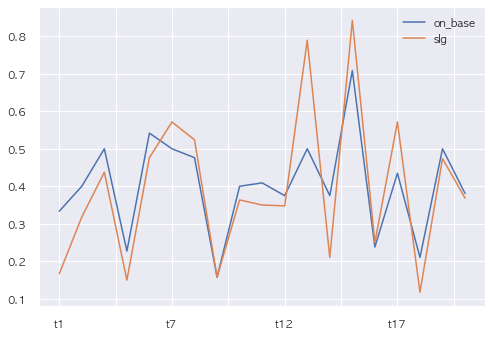

In [29]:
temp[(temp.gap < game_base)&(temp['이름']==players[0])][['on_base','slg']].plot()

<AxesSubplot:>

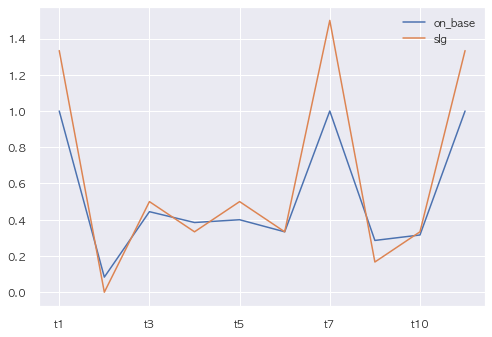

In [30]:
temp[(temp.gap < game_base)&(temp['이름']==players[100])][['on_base','slg']].plot()

<AxesSubplot:>

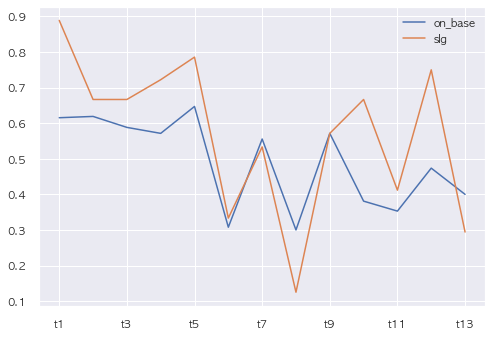

In [31]:
temp[(temp.gap < game_base)&(temp['이름']==players[80])][['on_base','slg']].plot()

<AxesSubplot:>

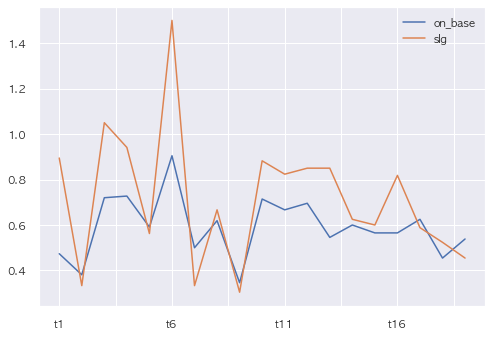

In [32]:
temp[(temp.gap < game_base)&(temp['이름']=='강백호')][['on_base','slg']].plot()

<AxesSubplot:>

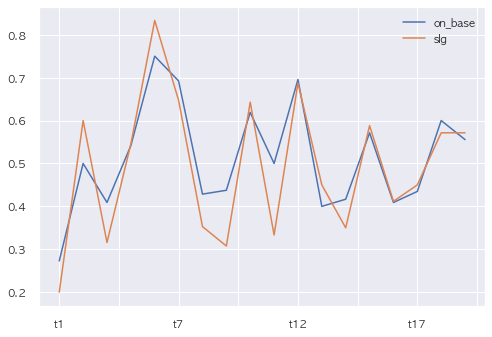

In [33]:
temp[(temp.gap < game_base)&(temp['이름']=='홍창기')][['on_base','slg']].plot()

In [34]:
temp.gap.describe().T

count                         2120
mean     8 days 04:07:14.716981132
std      9 days 10:30:55.703506759
min                1 days 00:00:00
25%                5 days 00:00:00
50%                5 days 00:00:00
75%                7 days 00:00:00
max               83 days 00:00:00
Name: gap, dtype: object

In [253]:
data2=temp[(temp.gap <= game_base)&(temp.num_game==WINDOW_SIZE)]
data2.gap=data2.gap.astype(str).str[:-4].astype(int)

/Users/george/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data=temp[(temp.gap <= game_base)&(temp.num_game==WINDOW_SIZE)]
data
data.gap=data.gap.astype(str).str[:-4].astype(int)

In [36]:
a=temp[(temp.gap < game_base)].reset_index().groupby('이름')['index'].count().gt(10).items()


In [37]:
b=[name for name, flag in a if flag==True]
b

['강민호',
 '강백호',
 '강승호',
 '강진성',
 '강한울',
 '고종욱',
 '구자욱',
 '권동진',
 '권희동',
 '김강민',
 '김민성',
 '김민수',
 '김민식',
 '김상수',
 '김선빈',
 '김성현',
 '김용의',
 '김웅빈',
 '김인태',
 '김재환',
 '김지찬',
 '김찬형',
 '김태군',
 '김태진',
 '김헌곤',
 '김현수',
 '김혜성',
 '김호재',
 '나성범',
 '노시환',
 '노진혁',
 '로맥',
 '류지혁',
 '마차도',
 '문보경',
 '박건우',
 '박경수',
 '박계범',
 '박동원',
 '박병호',
 '박석민',
 '박성한',
 '박준영',
 '박찬호',
 '박해민',
 '배정대',
 '서건창',
 '손아섭',
 '송민섭',
 '송우현',
 '심우준',
 '안재석',
 '안치홍',
 '알몬테',
 '알테어',
 '양석환',
 '양의지',
 '오윤석',
 '오재일',
 '오지환',
 '오태곤',
 '유강남',
 '유한준',
 '이대호',
 '이명기',
 '이용규',
 '이원석',
 '이재원',
 '이정후',
 '이지영',
 '이창진',
 '이천웅',
 '이형종',
 '이흥련',
 '장성우',
 '장승현',
 '장운호',
 '전병우',
 '전준우',
 '정은원',
 '정의윤',
 '정주현',
 '정훈',
 '조수행',
 '조용호',
 '채은성',
 '최원준',
 '최재훈',
 '최정',
 '최주환',
 '최지훈',
 '최형우',
 '추신수',
 '추재현',
 '터커',
 '페르난데스',
 '피렐라',
 '하주석',
 '한동희',
 '한승택',
 '한유섬',
 '허경민',
 '홍창기',
 '황재균',
 '힐리']

In [38]:
len(b)

105

In [39]:
temp[(temp.gap < game_base)&(temp['이름']==b[0])]['on_base'].to_frame().T.iloc[:,:10]

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10
on_base,0.533333,0.666667,0.35,0.333333,0.478261,0.5,0.391304,0.4375,0.588235,0.428571


In [40]:
temp[(temp.gap < game_base)&(temp['이름']==b[20])]['on_base'].to_frame().T.iloc[:,:10]

,t1,t2,t3,t5,t6,t7,t8,t9,t10,t11
on_base,0.470588,0.125,0.142857,0.25,0.285714,0.388889,0.368421,0.318182,0.315789,0.090909


In [80]:
sequence = []
for name in b:
    
    sequence.append(temp[(temp.gap < game_base)&(temp['이름']==name)]['on_base'].to_frame().T.iloc[:,:11])
    sequence[-1].columns= ['t'+str(i) for i in range(1,12)]

In [81]:
sequence[-1].columns
# dict(zip(sequence[-1].columns,['t'+str(i) for i in range(1,12)]))


Index(['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11'], dtype='object')

['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10', 't11']

In [82]:
tot_seq = reduce(lambda left, right: pd.concat([left,right]), sequence)

In [86]:
tot_seq.index = b

In [91]:
tot_seq=tot_seq.dropna()

<AxesSubplot:>

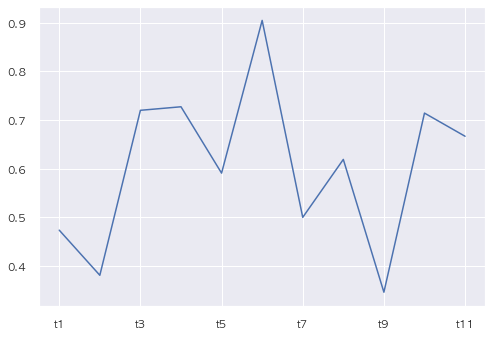

In [183]:
tot_seq.iloc[1,:].plot()

In [184]:
tot_seq

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11
강민호,0.533333,0.666667,0.350000,0.333333,0.478261,0.500000,0.391304,0.437500,0.588235,0.428571,0.470588
강백호,0.473684,0.380952,0.720000,0.727273,0.590909,0.904762,0.500000,0.619048,0.346154,0.714286,0.666667
강승호,0.166667,0.200000,0.333333,0.176471,0.409091,0.315789,0.235294,0.400000,0.250000,0.277778,0.409091
강진성,0.235294,0.647059,0.571429,0.666667,0.294118,0.350000,0.600000,0.315789,0.411765,0.388889,0.473684
강한울,0.166667,0.857143,0.400000,0.545455,0.388889,0.333333,0.200000,0.250000,0.200000,0.375000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
한유섬,0.647059,0.176471,0.428571,0.277778,0.631579,0.434783,0.538462,0.578947,0.631579,0.352941,0.526316
허경민,0.200000,0.400000,0.375000,0.625000,0.190476,0.619048,0.375000,0.500000,0.260870,0.409091,0.800000
홍창기,0.272727,0.500000,0.409091,0.541667,0.750000,0.692308,0.428571,0.437500,0.619048,0.500000,0.695652
황재균,0.454545,0.636364,0.476190,0.333333,0.500000,0.454545,0.350000,0.500000,0.458333,0.434783,0.619048


In [259]:
#data2.dropna().to_csv('../dataset/base_per_game2.csv')

In [260]:
data2

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t1,김혜성,2021,2,0,0,0,0,3,0,0,4,0,12,2,61,5,5,0.333333,0.166667
t2,김혜성,2021,7,0,0,0,0,2,1,0,3,0,22,1,94,5,5,0.400000,0.318182
t3,김혜성,2021,5,1,0,0,0,4,0,0,2,0,16,0,79,6,5,0.500000,0.437500
t5,김혜성,2021,3,0,0,0,0,2,0,0,3,0,20,2,77,5,5,0.227273,0.150000
t6,김혜성,2021,10,0,0,0,0,3,0,0,3,0,21,2,94,5,5,0.541667,0.476190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t2,김수환,2021,1,1,0,0,0,0,0,1,7,0,16,0,64,24,5,0.125000,0.187500
t1,이진영,2021,3,0,1,0,2,1,0,0,2,0,9,1,54,32,5,0.583333,0.666667
t2,이진영,2021,3,1,0,1,1,2,0,0,10,0,14,0,71,10,5,0.470588,0.642857
t1,김건형,2021,2,1,0,0,0,2,0,0,3,0,15,0,82,7,5,0.294118,0.266667


In [294]:
result

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t2,김재현,2018,0,0,0,0,0,0,0,0,1,1,6,1,16,5,5,0.000000,0.000000
t3,김재현,2018,1,0,0,0,0,1,0,1,1,2,8,0,34,7,5,0.181818,0.125000
t4,김재현,2018,2,0,0,0,0,1,0,0,6,0,15,0,66,7,5,0.187500,0.133333
t5,김재현,2018,3,0,0,0,1,2,0,0,4,0,15,3,74,5,5,0.333333,0.200000
t6,김재현,2018,2,0,0,0,0,1,0,0,4,0,9,0,45,6,5,0.300000,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t2,민병헌,2021,3,1,0,0,0,3,0,0,5,1,18,0,85,12,5,0.318182,0.277778
t2,이해창,2021,3,0,0,0,0,1,0,0,4,0,17,0,58,14,5,0.222222,0.176471
t2,김수환,2021,1,1,0,0,0,0,0,1,7,0,16,0,64,24,5,0.125000,0.187500
t2,이진영,2021,3,1,0,1,1,2,0,0,10,0,14,0,71,10,5,0.470588,0.642857


In [295]:
base_per_game_

,이름,year,안타,2타,3타,홈런,사구,볼넷,고4,병살,삼진,희타,타수,도루,투구,gap,num_game,on_base,slg
t1,김재현,2018,1,0,0,0,0,0,0,0,3,0,7,0,24,8,5,NaN,NaN
t2,김재현,2018,0,0,0,0,0,0,0,0,1,1,6,1,16,5,5,0.000000,0.000000
t3,김재현,2018,1,0,0,0,0,1,0,1,1,2,8,0,34,7,5,0.181818,0.125000
t4,김재현,2018,2,0,0,0,0,1,0,0,6,0,15,0,66,7,5,0.187500,0.133333
t5,김재현,2018,3,0,0,0,1,2,0,0,4,0,15,3,74,5,5,0.333333,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
t2,김수환,2021,1,1,0,0,0,0,0,1,7,0,16,0,64,24,5,0.125000,0.187500
t1,이진영,2021,3,0,1,0,2,1,0,0,2,0,9,1,54,32,5,NaN,NaN
t2,이진영,2021,3,1,0,1,1,2,0,0,10,0,14,0,71,10,5,0.470588,0.642857
t1,김건형,2021,2,1,0,0,0,2,0,0,3,0,15,0,82,7,5,NaN,NaN
